# Linear Regression

## General Form

$$
h(x) = \sum_{i=0}^{d} \theta_i x_i = \theta^{T}x
$$

where

$\theta$ is the parameters

$x$ is the variable

## Cost Function

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}
$$

Regresssion with this kind of loss function is called **ordinary least squares**

## LMS (Least Mean Squared) Algorithm
1. We want to choose $\theta$ to minimize $J(\theta)$
2. to do so, we start with initial guess
3. repeatedly update $\theta$ to make $J(\theta)$ smaller

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
$$
where $\alpha$ is the learning rate

since the derivatives $\frac{\partial}{\partial\theta_j} J(\theta)$  is

$$
\frac{\partial}{\partial\theta_j} J(\theta) = (h_\theta(x) - y)x_j
$$

then we will get the update rule for $\theta_j$

$$
\theta_j := \theta_j + \alpha(y^{(i)} - h_\theta(x^{(i)}))x^{(i)}
$$

In [1]:
import pandas as pd
import numpy as np

In [134]:
def h_x(theta, x):
    """
    the dot product between weight & x
    """
    y = np.zeros(x.shape[0])
    
    for i in range(len(y)):
        y[i] = theta @ x[i]
    return y

def update_theta(theta, y, h_x, x, alpha=0.01):
    """
    produces new theta
    """
    return theta + alpha * ((y - h_x) @ x)

In [135]:
def learn(theta, x, y, max_iter=1000):
    """
    learn with gradient descent
    """
    i = 0
    stop = False
    h_x1 = h_x(theta, x)
    theta_new = np.copy(theta)
    
    while not stop or i == max_iter:
        theta_new = update_theta(theta, y, h_x1, x)            
        if np.all(np.isclose(theta, theta_new)):
            stop = True
            
        theta = np.copy(theta_new)
        h_x1 = h_x(theta, x)
        i += 1
    return theta

def rmse(y_true, y_predicted):
    """
    calculate root mean squared error
    """
    return np.mean(np.sqrt(np.power(y_predicted - y_true, 2)))

In [136]:
x = np.array([[1.,1.,3.],[2.,2.,2.],[3.,3.,3.], [4., 4., 4.]])
y = np.array([2.,4.,6., 8.])
theta = np.array([1.,1.,1.])

pred = h_x(theta, x)
print('initial prediction: {}, rmse: {}'.format(pred, rmse(y, pred)))
print('y: {}'.format(y))

new_theta = learn(theta, x, y)
pred = h_x(new_theta, x)
print('current_prediction: {}, rmse: {}'.format(pred, rmse(y, pred)))


initial prediction: [ 5.  6.  9. 12.], rmse: 3.0
y: [2. 4. 6. 8.]
current_prediction: [2.00000075 3.99999991 5.99999987 7.99999982], rmse: 2.8862683865149563e-07


this algorithm is called **stochastic gradient descent** (we just need to change theta into some random numbers instead of starting from 1 for each dimension) or **incremental gradient descent**

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

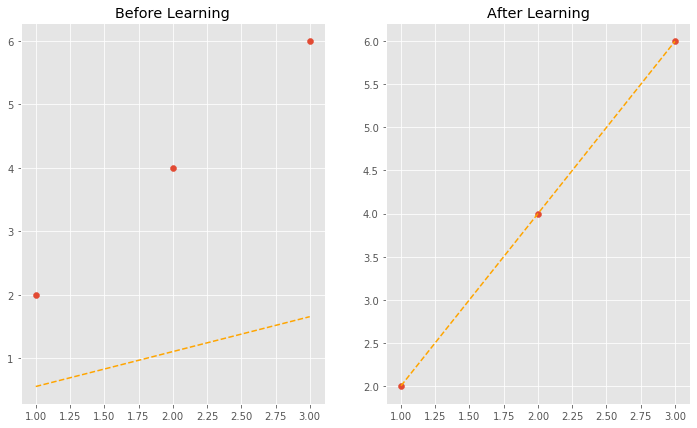

In [143]:
np.random.seed(3)
theta = np.random.rand(1)
x = np.array([[1.],[2.],[3.]])
y = np.array([2.,4.,6.])

theta_new = learn(theta, x, y)
pred = h_x(theta_new, x)

f, ax = plt.subplots(figsize=(12, 7))
plt.subplot(121)
plt.title('Before Learning')
plt.scatter(x[:,0], y)
plt.plot(x, h_x(theta, x), linestyle='--', c='orange')

plt.subplot(122)
plt.title('After Learning')
plt.scatter(x=x[:,0], y=y)
plt.plot(x, pred, linestyle='--', c='orange')



# References
1. Stanford CS229 Lecture Notes.
2. http://tutorial.math.lamar.edu/pdf/calculus_cheat_sheet_derivatives.pdf